In [336]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

schools_path = os.path.join("Resources" , "schools_complete.csv")
students_path = os.path.join ("Resources", "students_complete.csv")

schools_data = pd.read_csv(schools_path)
students_data = pd.read_csv(students_path)

data_complete = pd.merge(students_data, schools_data, 
                how="left", 
                on=["school_name", "school_name"])\
                .rename(columns=lambda s:s.lower().replace(" ", "_"))
data_complete

,student_id,student_name,gender,grade,school_name,reading_score,math_score,school_id,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [337]:
total_schools = (len(data_complete["school_name"].unique()))
total_students = (len(data_complete["student_id"].unique()))
district_budget = (data_complete.drop_duplicates('school_name')['budget'].sum())

math_average = round(data_complete["math_score"].mean(),3)
reading_average = round(data_complete["reading_score"].mean(),3)

# Total number of passed students in each class
students_passing_math = round(data_complete[data_complete["math_score"] >= 70].count()["student_id"], 3)
students_passing_reading = round(data_complete[data_complete["reading_score"] >= 70].count()["student_id"], 3)

percentage_students_passed_math = round((students_passing_math/total_students)*100, 3)
percentage_students_passed_reading = round((students_passing_reading/total_students)*100, 3)

# Porcentage of passed students in the district
district_overall_passing_rate = round((percentage_students_passed_math + percentage_students_passed_reading)/2, 3)

d = {"Summary":["Total Schools", "Total Students", "District Budget", "District Passing Rate"],
         "  ":[total_schools, total_students, district_budget, district_overall_passing_rate]
    }

d2 = {"Summary": ["Average Grade", "Passing Students"],
      "Math": [math_average, percentage_students_passed_math],
      "Reading": [reading_average, percentage_students_passed_reading]
     }

district_summary = pd.DataFrame(d)

education_summary = pd.DataFrame(d2)

In [338]:
district_summary

,Summary,
0,Total Schools,1.500000e+01
1,Total Students,3.917000e+04
2,District Budget,2.464943e+07
3,District Passing Rate,8.039300e+01


In [339]:
school_type = schools_data.set_index(["school_name"])["type"]
total_students_per_school = data_complete.groupby(["school_name"]).mean()["size"]
budget_per_school = data_complete.groupby(["school_name"]).mean()["budget"]
budget_per_student = budget_per_school/total_students_per_school

math_average_score_per_school = round(data_complete.groupby(["school_name"]).mean()["math_score"],3)
reading_average_score_per_school = round(data_complete.groupby(["school_name"]).mean()["reading_score"],3)

students_passed_math = data_complete[(data_complete["math_score"]>=70)]
students_passed_math_per_school = students_passed_math.groupby(["school_name"]).count()["student_id"]

students_passed_reading = data_complete[(data_complete["reading_score"]>=70)]
students_passed_reading_per_school = students_passed_reading.groupby(["school_name"]).count()["student_id"]

percentage_passed_math_per_school = round((students_passed_math_per_school/total_students_per_school)*100,3)
percentage_passed_reading_per_school = round((students_passed_reading_per_school/total_students_per_school)*100,3)

overall_passed_rate_per_school = round((percentage_passed_math_per_school + percentage_passed_reading_per_school)/2,3)

d3 = {
      "School Type":school_type, 
      "Number of Students": total_students_per_school, 
      "Budget per School":budget_per_school, 
      "Budget per Student":budget_per_student,
      "Average Math Score": math_average_score_per_school,
      "Average Reading Score":reading_average_score_per_school,
      "% Passing Math": percentage_passed_math_per_school,
      "% Passing Reading": percentage_passed_reading_per_school,
      "% Overall Passing Rate":overall_passed_rate_per_school
      }
school_summary = pd.DataFrame(d3)


## District Summary

In [340]:
district_summary

,Summary,
0,Total Schools,1.500000e+01
1,Total Students,3.917000e+04
2,District Budget,2.464943e+07
3,District Passing Rate,8.039300e+01


In [341]:
education_summary

,Summary,Math,Reading
0,Average Grade,78.985,81.878
1,Passing Students,74.981,85.805


In [342]:
# District passed students
#passed_students = school_summary.loc['school_name'].groupby('school_name')\
 #                       .mean()[\
  #                      [ 
   #                      "% Passing Math", 
    #                     "% Passing Reading" 
     #                     ]
      #                  ]
#passed_students.plot.bar()

#plt.title("Comparison between charter and district school")
#plt.legend
#plt.show ()

## School Summary

In [343]:
school_summary

,School Type,Number of Students,Budget per School,Budget per Student,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Bailey High School,District,4976.0,3124928.0,628.0,77.048,81.034,66.680,81.933,74.306
Cabrera High School,Charter,1858.0,1081356.0,582.0,83.062,83.976,94.133,97.040,95.586
Figueroa High School,District,2949.0,1884411.0,639.0,76.712,81.158,65.988,80.739,73.364
Ford High School,District,2739.0,1763916.0,644.0,77.103,80.746,68.310,79.299,73.804
Griffin High School,Charter,1468.0,917500.0,625.0,83.351,83.817,93.392,97.139,95.266
Hernandez High School,District,4635.0,3022020.0,652.0,77.290,80.934,66.753,80.863,73.808
Holden High School,Charter,427.0,248087.0,581.0,83.803,83.815,92.506,96.253,94.380
Huang High School,District,2917.0,1910635.0,655.0,76.629,81.183,65.684,81.316,73.500
Johnson High School,District,4761.0,3094650.0,650.0,77.072,80.966,66.058,81.222,73.640
Pena High School,Charter,962.0,585858.0,609.0,83.840,84.045,94.595,95.946,95.270


## Top 5 Performing Schools (By Passing Rate)

In [344]:
top_schools = school_summary.sort_values(by="% Overall Passing Rate", ascending=False)
top_schools.head(5)

,School Type,Number of Students,Budget per School,Budget per Student,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Cabrera High School,Charter,1858.0,1081356.0,582.0,83.062,83.976,94.133,97.040,95.586
Thomas High School,Charter,1635.0,1043130.0,638.0,83.418,83.849,93.272,97.309,95.291
Pena High School,Charter,962.0,585858.0,609.0,83.840,84.045,94.595,95.946,95.270
Griffin High School,Charter,1468.0,917500.0,625.0,83.351,83.817,93.392,97.139,95.266
Wilson High School,Charter,2283.0,1319574.0,578.0,83.274,83.989,93.868,96.540,95.204


## Worst 5 Performing Schools (By Passing Rate)

In [345]:
bottom_schools = school_summary.sort_values(by="% Overall Passing Rate", ascending=True)
bottom_schools.head(5)

,School Type,Number of Students,Budget per School,Budget per Student,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Rodriguez High School,District,3999.0,2547363.0,637.0,76.843,80.745,66.367,80.220,73.294
Figueroa High School,District,2949.0,1884411.0,639.0,76.712,81.158,65.988,80.739,73.364
Huang High School,District,2917.0,1910635.0,655.0,76.629,81.183,65.684,81.316,73.500
Johnson High School,District,4761.0,3094650.0,650.0,77.072,80.966,66.058,81.222,73.640
Ford High School,District,2739.0,1763916.0,644.0,77.103,80.746,68.310,79.299,73.804


## Math Scores by Grade per School

In [346]:
# filter per grade
grade_9 = data_complete[data_complete["grade"] == "9th"]
grade_10 = data_complete[data_complete["grade"] == "10th"]
grade_11 = data_complete[data_complete["grade"] == "11th"]
grade_12 = data_complete[data_complete["grade"] == "12th"]

# Average math scores per grade per school

grade_9_math_per_school = round(grade_9.groupby(["school_name"]).mean()["math_score"], 3)
grade_10_math_per_school = round(grade_10.groupby(["school_name"]).mean()["math_score"], 3)
grade_11_math_per_school = round(grade_11.groupby(["school_name"]).mean()["math_score"], 3)
grade_12_math_per_school = round(grade_12.groupby(["school_name"]).mean()["math_score"], 3)

# Combine the grades

avg_math_grade_per_school = pd.DataFrame ({
        "9th": grade_9_math_per_school,
        "10th":grade_10_math_per_school,
        "11th":grade_11_math_per_school,            
        "12th":grade_12_math_per_school
           })
                                            
avg_math_grade_per_school

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.084,76.997,77.516,76.492
Cabrera High School,83.095,83.155,82.766,83.277
Figueroa High School,76.403,76.540,76.884,77.151
Ford High School,77.361,77.672,76.918,76.180
Griffin High School,82.044,84.229,83.842,83.356
Hernandez High School,77.438,77.337,77.136,77.187
Holden High School,83.787,83.430,85.000,82.855
Huang High School,77.027,75.909,76.447,77.226
Johnson High School,77.188,76.691,77.492,76.863


## Reading Score by Grade per School

In [347]:
# Average math scores per grade per school

grade_9_reading_per_school = round(grade_9.groupby(["school_name"]).mean()["reading_score"], 3)
grade_10_reading_per_school = round(grade_10.groupby(["school_name"]).mean()["reading_score"], 3)
grade_11_reading_per_school = round(grade_11.groupby(["school_name"]).mean()["reading_score"], 3)
grade_12_reading_per_school = round(grade_12.groupby(["school_name"]).mean()["reading_score"], 3)

# Combine the grades

avg_reading_grade_per_school = pd.DataFrame ({
        "9th": grade_9_reading_per_school,
        "10th":grade_10_reading_per_school,
        "11th":grade_11_reading_per_school,            
        "12th":grade_12_reading_per_school
           })
                                            
avg_reading_grade_per_school




,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303,80.907,80.946,80.912
Cabrera High School,83.676,84.253,83.788,84.288
Figueroa High School,81.199,81.409,80.640,81.385
Ford High School,80.633,81.263,80.404,80.662
Griffin High School,83.369,83.707,84.288,84.014
Hernandez High School,80.867,80.660,81.396,80.857
Holden High School,83.677,83.325,83.816,84.699
Huang High School,81.290,81.512,81.417,80.306
Johnson High School,81.261,80.773,80.616,81.228


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [350]:
# create bins to categorise the schools based on budget per student

y = pd.cut(x=school_summary["Budget per Student"], bins=[0, 585, 615, 645, 675],
       labels=["<$585", "$585 - $615", "$615 - $645", "$645 - $675"],
       right=False)
schools_spending = school_summary.assign(Spending=y)


In [351]:
scores_by_school_spending = schools_spending.groupby("Spending")\
                        .mean()[\
                        ["Average Math Score" , 
                        "Average Reading Score", 
                         "% Passing Math", 
                         "% Passing Reading", 
                         "% Overall Passing Rate" ]]
scores_by_school_spending

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending,,,,,
<$585,83.455250,83.933750,93.460000,96.611000,95.035500
$585 - $615,83.599500,83.885500,94.231000,95.900500,95.065500
$615 - $645,79.079167,81.891500,75.668167,86.106500,80.887500
$645 - $675,76.997000,81.027667,66.165000,81.133667,73.649333


## Scores by School Size

* Perform the same operations as above, based on school size.

In [353]:
#create bins to categorise the schools based on size

x = pd.cut(x=school_summary["Number of Students"], bins=[0,1500,3000,5000],
       labels=["Small (<1500)","Medium (1500 - 3000)","Large (3000 - 5000)"],
       right=False,
      )
schools_size = school_summary.assign(Size=x)

In [354]:
scores_by_school_size = schools_size.groupby("Size")\
                        .mean()[\
                        ["Average Math Score" , 
                        "Average Reading Score", 
                         "% Passing Math", 
                         "% Passing Reading", 
                         "% Overall Passing Rate" ]]
scores_by_school_size

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Size,,,,,
Small (<1500),83.664667,83.892333,93.497667,96.446000,94.97200
Medium (1500 - 3000),80.904875,82.822750,83.556875,90.588625,87.07275
Large (3000 - 5000),77.063250,80.919750,66.464500,81.059500,73.76200


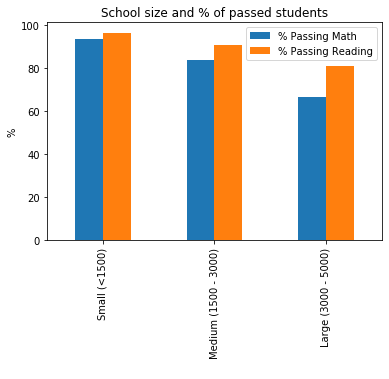

In [355]:
# Graphic size vs passed
size_vs_passed = schools_size.groupby("Size")\
                        .mean()[\
                        [
                         "% Passing Math", 
                         "% Passing Reading"
                        ]
                               ]
                              

size_vs_passed.plot.bar()                       
plt.title("School size and % of passed students")
plt.xlabel("  ")
plt.ylabel("%")
plt.legend
plt.show ()


## Scores by School Type

* Perform the same operations as above, based on school type.

In [356]:
scores_by_school_type = school_summary.groupby("School Type")\
                        .mean()[\
                        ["Average Math Score" , 
                        "Average Reading Score", 
                         "% Passing Math", 
                         "% Passing Reading", 
                         "% Overall Passing Rate" ]]
scores_by_school_type

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473625,83.896500,93.620750,96.586625,95.103750
District,76.956714,80.966571,66.548571,80.798857,73.673714


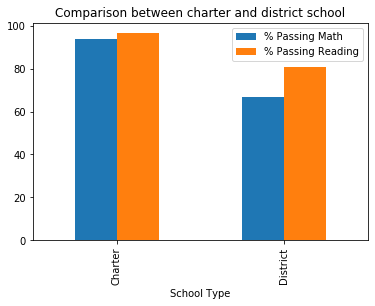

In [357]:
# Graphic Charter vs District
charter_vs_district_passed_students = school_summary.groupby("School Type")\
                        .mean()[\
                        [ 
                         "% Passing Math", 
                         "% Passing Reading" 
                          ]
                        ]
charter_vs_district_passed_students.plot.bar()

plt.title("Comparison between charter and district school")
plt.legend
plt.show ()

In [358]:
#extra analysi


# Number of students that 
num_students_per_school_type = school_summary.groupby("School Type").mean()["Number of Students"]
num_students_per_school_type


spending_vs_passing = schools_spending.groupby("Spending")\
                        .mean()[ 
                         "% Overall Passing Rate" ]
size_vs_passed = schools_size.groupby("Size")\
                        .mean()["% Overall Passing Rate" ]

#data_spending_size = pd.merge(size_vs_passed, spending_vs_passing)

data_spending = pd.DataFrame(spending_vs_passing)
data_spending


,% Overall Passing Rate
Spending,
<$585,95.035500
$585 - $615,95.065500
$615 - $645,80.887500
$645 - $675,73.649333


In [360]:
data_size = pd.DataFrame(size_vs_passed)
data_size

,% Overall Passing Rate
Size,
Small (<1500),94.97200
Medium (1500 - 3000),87.07275
Large (3000 - 5000),73.76200


Text(0.5, 1.0, 'Overall passing rate related to the school size')

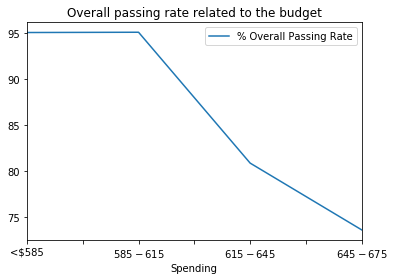

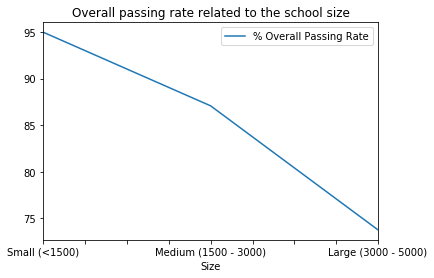

In [361]:
data_spending.plot()
plt.title("Overall passing rate related to the budget")
data_size.plot()
plt.title("Overall passing rate related to the school size")



In [362]:

#school_type, 
#      "Number of Students": total_students_per_school, 
#      "Budget per School":budget_per_school, 
#      "Budget per Student":budget_per_student,
#      "Average Math Score": math_average_score_per_school,
#      "Average Reading Score":reading_average_score_per_school,
#      "% Passing Math": percentage_passed_math_per_school,
#      "% Passing Reading": percentage_passed_reading_per_school,
#      "% Overall Passing Rate":overall_passed_rate_per_school


In [363]:
#Styling

# formating value as currency budget_per_student
#school_summary['budget_per_school'] = school_summary['budget_per_school'].map('${:,.2f}'.format)





In [364]:
#Extra


In [365]:
# Analysis

#
